**Plot geodetic data from the FITS (FIeld Time Series) database**

In this notebook we will go through some basic data access, csv writing, and plotting of geodetic data from the FITS (FIeld Time Series) database using Python. We will mostly use the [pandas](http://pandas.pydata.org/pandas-docs/stable/overview.html) package for the data manipulation and plotting, but we will supplement this package's functionality with the [numpy](http://www.numpy.org/) and [matplotlib](https://matplotlib.org/) packages.

For a guide to the FITS API visit https://fits.geonet.org.nz/api-docs/.

First of all we will need to import the packages into Python so that their modules can be accessed.

In [1]:
# Import packages

import pandas as pd # import the pandas package and rename it as pd

import numpy as np # import the numpy package and rename it as np

import matplotlib.pyplot as plt # import the pyplot module from the matplotlib package and rename it plt

If these packages exist and are recognised by the host computer's python installation this step should run without error.

Next we need to specify what geodetic site we want the data from and what type of data we want.

In [2]:
# Set parameters to use in FITS API query

site = 'KAIK' # site code is four letters
data_type = 'u' # data type is one letter: u (up), n (north), e (east)

# Ensure parameters are in the correct format for use with the FITS API

site = str.upper(site) # ensure site code is upper case

The next code segment will build a FITS API query from the site and data type parameters. We will look only at observation data in this notebook, so we will use the https://fits.geonet.org.nz/observation? URL as the prefix to our queries.

FITS API queries are in the format *query_prefix?x=a&y=b&z=c* where *a*, *b*, *c* are features of the data we want, and *x*, *y*, *z* describe what these features are, e.g. https://fits.geonet.org.nz/observation?typeID=a&siteID=b&days=c will provide data of type *a* from the site *b* for *c* days prior to today. By default all observation data of the given type from the chosen site will be provided if no *days* parameter value is specified.

Once the query is built we will use pandas csv reading module to parse the data into Python. We will use some of the additional functionality of this module to shape the parsed csv data into an easy-to-use format.

In [3]:
# Build a FITS API query by combining parameter:value pairs in the query format

query_suffix = 'siteID=%s&typeID=%s' % (site, data_type)

# Combine the query parameter=value string with the FITS observation data URL

URL = 'https://fits.geonet.org.nz/observation?' + query_suffix

# Use pandas csv reading functionality to parse the FITS obervation data into Python

data = pd.read_csv(URL, names=['date-time', data_type, 'error'], header=0, parse_dates=[0], index_col=0)

The data is now in a DataFrame object in Python. This object has three parts: headers (data types), the index (times), and the values (observation data values). This structure is highly malleable and allows data to be accessed and altered in an almost endless number of ways. Here we will use both a number-based and header-based indexing of the DataFrame to plot parts of the data.

In [4]:
# Optional: print the DataFrame object to inspect it as a whole and in parts

display_data = False # change variable value to True to print DataFrame and its segments

if display_data == True:
    
    print('\n --- DataFrame object --- \n')
    print(data.to_string()) # prints DataFrame without central ... truncation
    print('\n --- DataFrame headers --- \n')
    print(data.columns)
    print('\n --- DataFrame index --- \n')
    print(data.index)
    print( '\n --- DataFrame values --- \n')
    print(data.values)

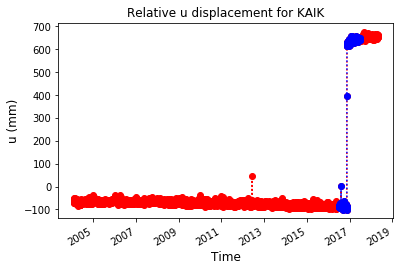

In [10]:
# Plot all the data in the first column of the DataFrame

data.iloc[:, 0].plot(marker='o', linestyle=':', color = 'red')

# Plot the data with header data_type for the year surrounding the 2016 Kaikoura earthquake
# Allow this plotting to fail non-destructively if the data does not exist for the site

try:
    
    data.loc['2016-07-01 11:59:00':'2017-07-01 11:59:00', data_type].plot(marker='o', linestyle=':', color = 'blue')
    
except:
    
    print('Plotting index is out of data range - skipping subset plotting')

# Add functional aspects to plot

plt.xlabel('Time', fontsize = 12)
plt.ylabel(data_type + ' (mm)', fontsize = 12)
plt.title('Relative ' + data_type + ' displacement for ' + site, fontsize = 12)
plt.show()

Note the blue points in the above plot - this is where the subset of data overprints the red "all data" plot. The real power of pandas for data management becomes apparent here: we can access certain sections of a huge dataset through the DataFrame index by simply specifying two bounding indexes (times).

To save the DataFrame as a csv, simply set the file name and use the to_csv function of the DataFrame object:

In [6]:
# Write data to a csv file in the user home directory
# set no-data values to numpy "not a number" format.

data.to_csv(path_or_buf = '~/FITS_data.csv', sep = ',', na_rep = np.nan)